### opencv

* 使用 opencv 读取图片，并对生成的矩阵进行模式变换
```
src_img = './test.jpg'
array_bgr = cv2.imread(src_img)
array_rgb = cv2.cvtColor(array_bgr, cv2.COLOR_BGR2RGB)
array_gray = cv2.cvtColor(array_bgr, cv2.COLOR_BGR2GRAY)
```
* 将矩阵写到文件中
```
cv2.imwrite('./new_img.jpg', array_gray)
```
* 显示opencv 中所有图片的模式转变
```
mode_convert = [x for x in dir(cv2) if 'COLOR_' in x]
```

### PIL
* 使用 Image 读取图片，并展示

```
from PIL import Image
img_rgb = Image.open(src_img)
img_gray = Image.open(src_img).convert('L')
img_rgb.show()

```

* Image 对象与 numpy 矩阵转换
```
array_rgb = np.asarray(img_rgb, dtype=np.int32) # shape=(height, width, channel)
array_gray = np.asarray(img_gray, dtype=np.int32)
new_img_rgb = Image.fromarray(array_rgb.astype('uint8'), mode='RGB') # uint8 is necessary
new_img_gray = Image.fromarray(array_gray.astype('uint8'), mode='L')
```

* 将 Image 对象写入文件中

```
img_rgb.save('./img_rgb.jpg')
```

### maplotlib

* `fig, axes = plt.subplots(nrows, ncols, figsize=(10, 5), **kwargs)`

 **fig**: Figure对象, 表示整张图, 可通过 fig.text(x, y, string) 在图上任意位置添加注释
 
 **axes**: numpy array，其中每个元素表示不同子图的对象, axes.shape=(nrows, ncols), 
 通过 `axes[0].get_position().bounds` 返回坐标值 `(x_left, y_lower, width, height)`
 
 **kwargs**: sharex, sharey, {True, 'col', 'row', 'all'}
 

* 为图片添加 colorbar

 * prepare image arrays
```
src_face = './test.jpg'
array_bgr = cv2.imread(src_face)
array_rgb = cv2.cvtColor(array_bgr, cv2.COLOR_BGR2RGB)
array_gray = cv2.cvtColor(array_bgr, cv2.COLOR_BGR2GRAY)
```

 * plot
```
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
mappable_1 = axes[0].imshow(array_gray, cmap='Blues', interpolation='none')
mappable_2 = axes[1].imshow(array_gray, cmap='Greens', interpolation='none')
fig.colorbar(mappable_1, ax=axes[0])
fig.colorbar(mappable_2, ax=axes[1])
axes[0].axis('off')
axes[1].axis('off')
plt.show()
```
![](http://oe5p7f8mz.bkt.clouddn.com/colorbar.png)
 如果图片矩阵为 **rgb** 类型，则 colorbar 不再生效
 
* 以 iris data 为列
  * prepare data
  ```
import pandas as pd
import matplotlib.pyplot as plt
iris_file = '/home/huizhu/bitbucket/test_data/iris/iris.csv'
df = pd.read_csv(iris_file)
x_1 = df['sepal length']
x_2 = df['sepal width']
x_3 = df['petal length']
class_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
Y = [class_dict[n] for n in df.values[:, 4].tolist()]
  ```
  * plot
  ```
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3), sharey=True)
mappable_1 = ax1.scatter(x_1, x_2, c=Y, cmap='Blues')
mappable_2 = ax2.scatter(x_3, x_2, c=Y, cmap='Blues')
ax1.set_xlabel('sepal length')
ax1.set_ylabel('sepal width')
ax2.set_xlabel('petal length')
fig.colorbar(mappable_1, ax=ax1)
fig.colorbar(mappable_2, ax=ax2)
plt.show()
  ```
  ![](http://oe5p7f8mz.bkt.clouddn.com/iris_colorbar.png)
  
* 可用的 cmaps
 ```
 # Have colormaps separated into categories:
 # http://matplotlib.org/examples/color/colormaps_reference.html
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]
 ```

In [3]:
import numpy as np
import pandas as pd
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import glob

In [4]:
src_faces = glob.glob('/home/huizhu/Hackthon/data-all/happy/*.jpg')
src_img = '/home/huizhu/bitbucket/Snow/latex/hebut.jpg'

In [5]:
array_bgr = cv2.imread(src_faces[0])
array_rgb = cv2.cvtColor(array_bgr, cv2.COLOR_BGR2RGB)
array_gray = cv2.cvtColor(array_bgr, cv2.COLOR_BGR2GRAY)
array_rgba = cv2.cvtColor(array_bgr, cv2.COLOR_BGR2RGBA)
(array_rgb.shape, array_gray.shape, array_rgba.shape)

((134, 134, 3), (134, 134), (134, 134, 4))

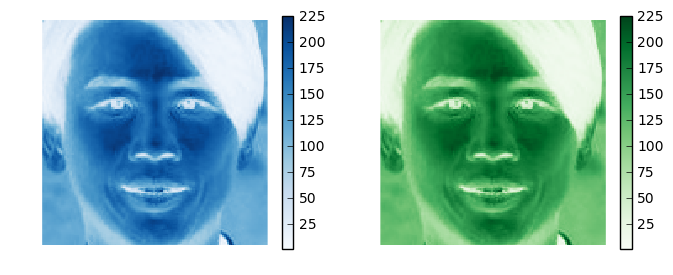

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
mappable_1 = axes[0].imshow(array_gray, cmap='Blues', interpolation='none')
mappable_2 = axes[1].imshow(array_gray, cmap='Greens', interpolation='none')
fig.colorbar(mappable_1, ax=axes[0])
fig.colorbar(mappable_2, ax=axes[1])
axes[0].axis('off')
axes[1].axis('off')
#plt.axis('off')
plt.show()

In [7]:
img = Image.open(src_img)
array = np.asarray(img, dtype=np.int32)
img_gray = Image.open(src_img).convert('L')
array_gray = np.asarray(img_gray, dtype=np.int32)
array_gray.shape, img.mode, img_gray.mode

((240, 240), 'RGB', 'L')

In [8]:
img_rgb = Image.fromarray(array.astype('uint8'), 'RGB')
img_gray = Image.fromarray(array_gray.astype('uint8'), 'L')
img_gray.show()

In [9]:
cv_array_bgr = cv2.imread(src_img)
cv_array_rgb = cv2.cvtColor(cv_array_bgr, cv2.COLOR_BGR2RGB)
pil_img_rgb = Image.open(src_img)
pil_array_rgb = np.asarray(pil_img_rgb).astype('uint8')
np.all(cv_array_rgb == pil_array_rgb)

True

In [10]:
img.show()

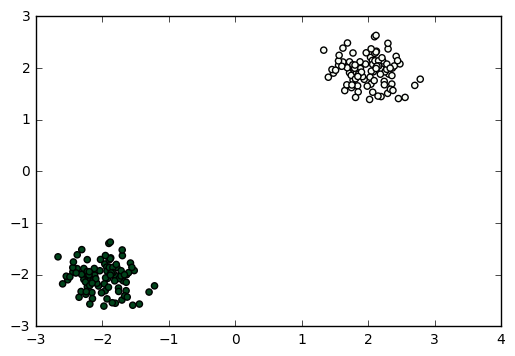

In [11]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
Y = np.r_[np.zeros(shape=(100,)), np.ones(shape=(100,))]
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y, cmap='Greens')
plt.show()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
iris_file = '/home/huizhu/bitbucket/test_data/iris/iris.csv'
class_dict = {'Iris-setosa': 0,
             'Iris-versicolor': 1,
             'Iris-virginica': 2}

df = pd.read_csv(iris_file)
x_1 = df['sepal length']
x_2 = df['sepal width']
x_3 = df['petal length']
Y = [class_dict[n] for n in df.values[:, 4].tolist()]

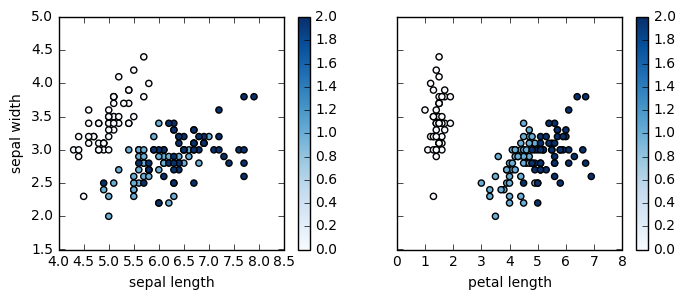

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3), sharey=True)
mappable_1 = ax1.scatter(x_1, x_2, c=Y, cmap='Blues')
mappable_2 = ax2.scatter(x_3, x_2, c=Y, cmap='Blues')
ax1.set_xlabel('sepal length')
ax1.set_ylabel('sepal width')
ax2.set_xlabel('petal length')
fig.colorbar(mappable_1, ax=ax1)
fig.colorbar(mappable_2, ax=ax2)
plt.show()